<a href="https://colab.research.google.com/github/bezhvin/Optimization-with-Tensorflow/blob/main/SimpleExampleNoConstraint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
from six.moves import xrange
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [4]:
#!pip install git+https://github.com/google-research/tensorflow_constrained_optimization
#import tensorflow_constrained_optimization as tfco

### simple non constrained opttimization

Let's start with a simple example of fitting some coefficients for a quadratic function:
$$y = ax^2 + bx+c$$
This is basically a simple plynomial fitting and can be done mathematically as it is a convex optimization. But for the sake of illustration let's assume we want to the find proper prameters ${a,b,c}$ via some iterative gradient based optimization.
Assuming the ground truth parameters are ${a=3, b=.5, and\ c=4}$, we have
$$y = 3x^2 + .5x+4$$
Let's generate the training data with 50 samples:

Text(0.5, 0, 'X')

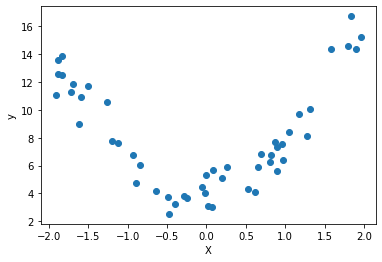

In [5]:
training_size = 50
y_clean = lambda x: 3*x**2 + .5*x + 4 

## randomly generating X
X= np.random.uniform(low=-2, high=2,size=training_size).astype(np.float32) ## input 
## and then generating the corresponding y
y = y_clean(X) + np.random.normal(size=training_size).astype(np.float32) # output --> we added some noise to make it more realistic
## how does it look like?
plt.scatter(X, y)
plt.ylabel('y'); plt.xlabel('X')

First, it is helpful to rewrite the problem in a matrix multiplication format 
$$y = AX $$
this helps the code to be cleaner and is more inline wit what tensorflow expect. In general we know computers are good at matrix multiplication so we always should try to frame our problems in in this way!
Thus, we can rewrite it as:

$$
y = \begin{bmatrix}  
a & b & c  
\end{bmatrix} 
\begin{bmatrix}  
x^2\\  
x\\  
1\\  
\end{bmatrix}$$

In [6]:
# y=AX
X_matrix = np.array([X**2, X, np.ones(X.size)]).T

In [7]:
# making constant tensors for the training data
y_ground_truth = tf.constant(y, dtype=tf.float32)
X_ground_truth = tf.constant(X_matrix, dtype=tf.float32)

In [8]:
# initializing the parameters a,b,and c as tensor variables
# this is the variable which will be updated during the optimization
weights = tf.Variable(tf.random_normal_initializer()(shape=[3], dtype=tf.float32))

In [9]:
# the estimated y (or prediction for y) using the weights we want to optimize
y_prediction = tf.tensordot(X_ground_truth, weights, axes=1)

To optimize the parameters we need to define an objective function. actually we optimize the parameters with respect to this objective function. In our example, the least square could be helpful:
$$ mean((y - y_{prediction})^2) $$

In [10]:
## tensorflow has already made many of the known objective functions available, e.g. in tf.compat.v1.losses
## but you may still wrtie down the objective formula yourself. Both ways are shown below
def objective():
    y_prediction = tf.tensordot(X_ground_truth, weights, axes=1)
    return tf.math.reduce_mean((y_ground_truth - y_prediction)**2)
#     return tf.compat.v1.losses.mean_squared_error(labels=y_ground_truth,
#                                                  predictions=y_prediction)

There are many gradient descent optimization algorithms and fortunately almost all are available in tensorflow. The choice of the algorithm depends on the task. In our example, all would work properly (some faster some slower).

In [11]:
# optimization
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1.0)
var_list=[weights]
for ii in range(100):
    optimizer.minimize(objective, var_list=var_list)
    #print(weights.numpy()) --> activate if you want to see how the parameters get updated
print(f'the parameters are: [a, b, c] = {(weights.numpy())}')

the parameters are: [a, b, c] = [2.9300997 0.6277682 4.034717 ]


These parameters are close to the ground truth coefficients, right? the small difference is due to the noise we added to the training data.